In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data/')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
os.getcwd()

'/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data'

# Data Load

In [6]:
cp = pd.read_csv('커피가격/coffee.csv')

In [7]:
cp

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD
...,...,...,...,...,...,...,...
5741,2022-08-29,240.55,240.55,240.55,240.50,1,USD
5742,2022-08-30,238.75,241.75,238.75,239.15,14,USD
5743,2022-08-31,240.75,240.75,239.65,239.10,12,USD
5744,2022-09-01,238.55,238.55,236.60,236.35,6,USD


In [8]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5746 non-null   object 
 1   Open      5746 non-null   float64
 2   High      5746 non-null   float64
 3   Low       5746 non-null   float64
 4   Close     5746 non-null   float64
 5   Volume    5746 non-null   int64  
 6   Currency  5746 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.4+ KB


In [9]:
cp.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [10]:
cp['Date'] = pd.to_datetime(cp['Date'], format='%Y-%m-%d')

In [11]:
cp['Currency'].value_counts()

USD    5746
Name: Currency, dtype: int64

# Visualization

In [12]:
cp.set_index('Date', inplace=True)

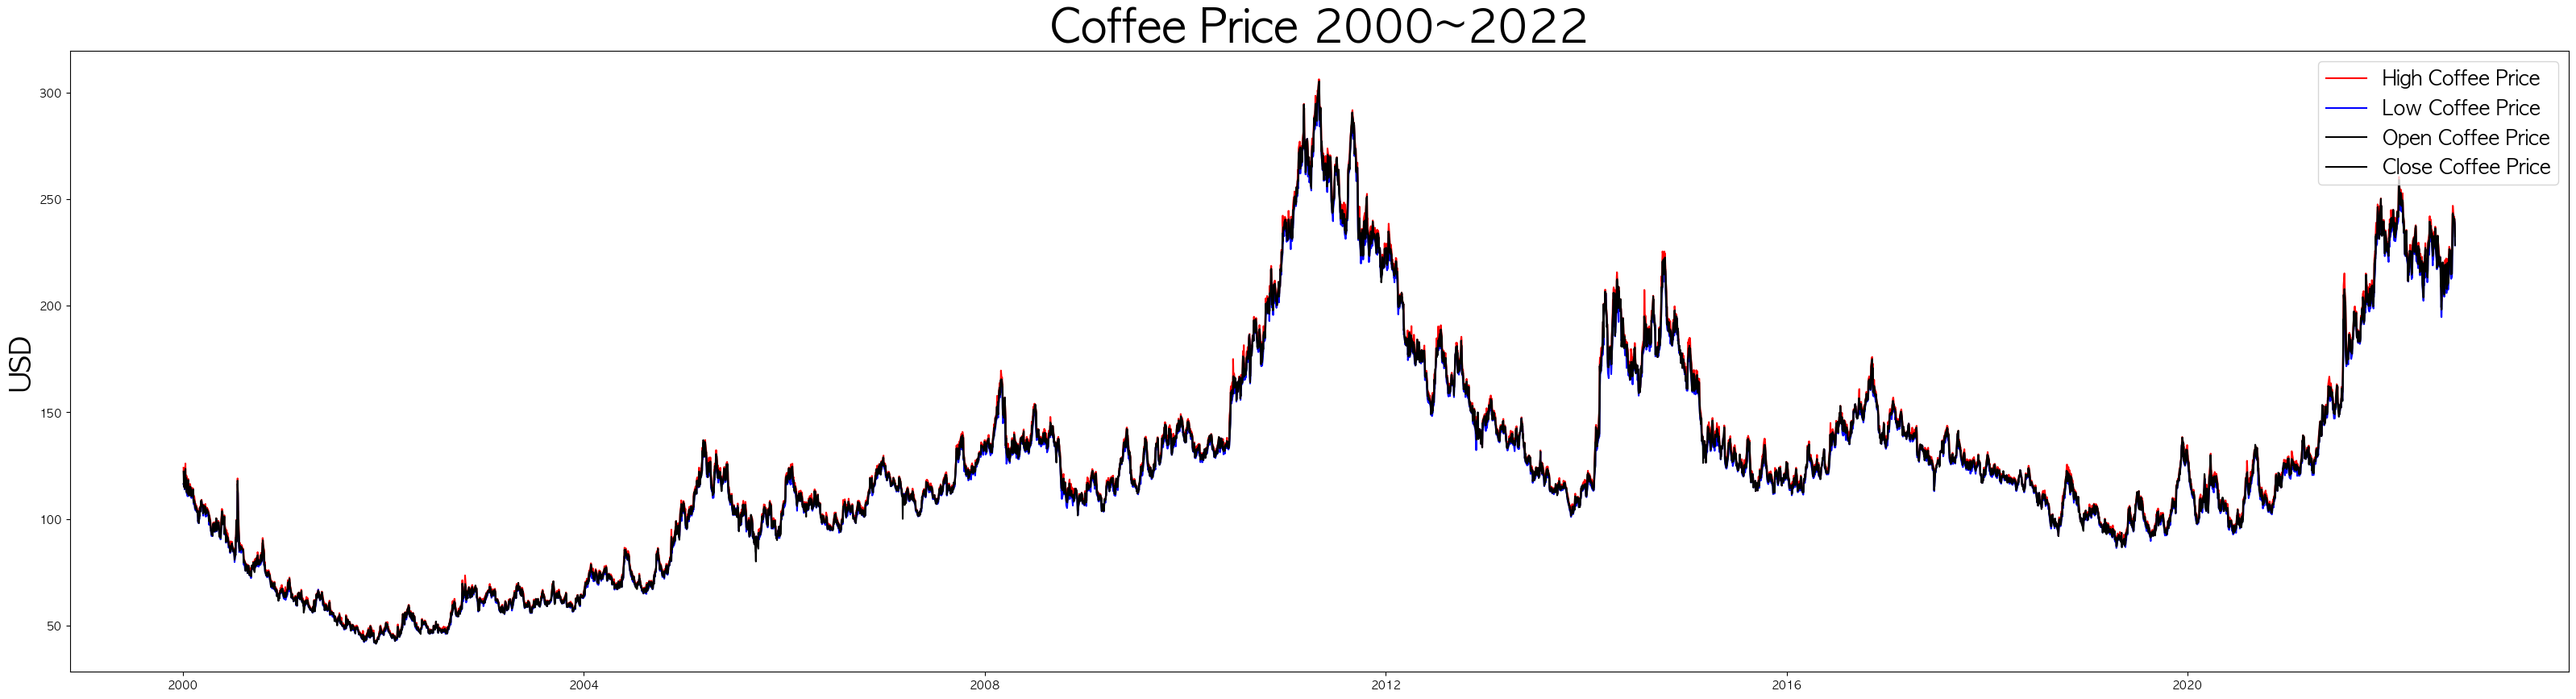

In [14]:
fig, ax1 = plt.subplots(figsize=(40, 10))

# A = cp[['High']]
# B = cp[['Low']]
line1 = ax1.plot(cp.index, cp['High'], label='High Coffee Price', color='r')
line2 = ax1.plot(cp.index, cp['Low'], label='Low Coffee Price', color='b')
line3 = ax1.plot(cp.index, cp['Open'], label='Open Coffee Price', color='k')
line4 = ax1.plot(cp.index, cp['Close'], label='Close Coffee Price', color='k')

lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('USD', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('Coffee Price 2000~2022', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.show()

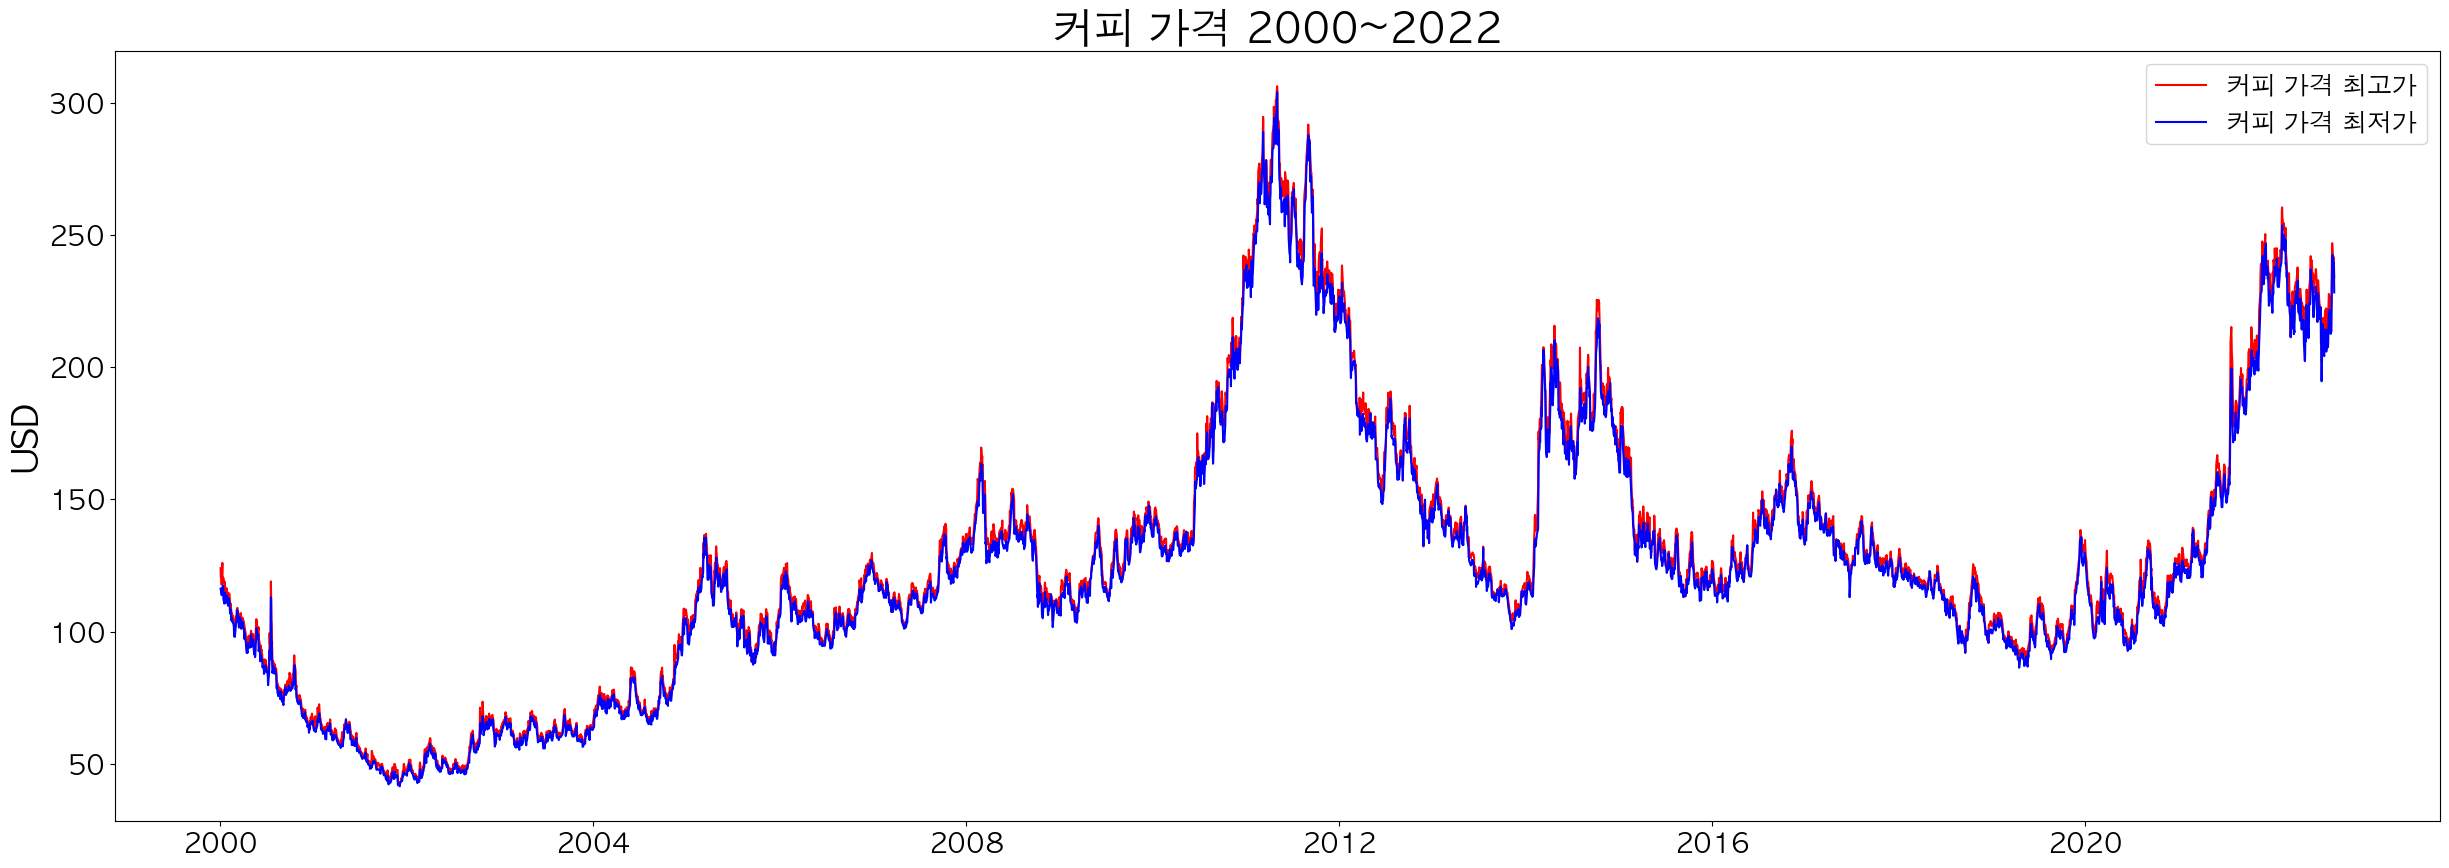

In [20]:
fig, ax1 = plt.subplots(figsize=(30, 10))

# A = cp[['High']]
# B = cp[['Low']]
line1 = ax1.plot(cp.index, cp['High'], label='커피 가격 최고가', color='r')
line2 = ax1.plot(cp.index, cp['Low'], label='커피 가격 최저가', color='b')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('USD', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('커피 가격 2000~2022', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.show()

# 2020~

In [21]:
cp.reset_index(inplace=True)

In [22]:
z = cp[cp['Date'].dt.year>=2020]

In [23]:
z

,Date,Open,High,Low,Close,Volume,Currency
5072,2020-01-02,129.55,130.95,126.50,127.10,21506,USD
5073,2020-01-03,127.20,128.45,125.45,126.35,16566,USD
5074,2020-01-06,126.25,126.55,121.55,122.15,24428,USD
5075,2020-01-07,122.60,123.40,119.85,122.40,21308,USD
5076,2020-01-08,122.50,123.05,118.25,119.15,23061,USD
...,...,...,...,...,...,...,...
5741,2022-08-29,240.55,240.55,240.55,240.50,1,USD
5742,2022-08-30,238.75,241.75,238.75,239.15,14,USD
5743,2022-08-31,240.75,240.75,239.65,239.10,12,USD
5744,2022-09-01,238.55,238.55,236.60,236.35,6,USD


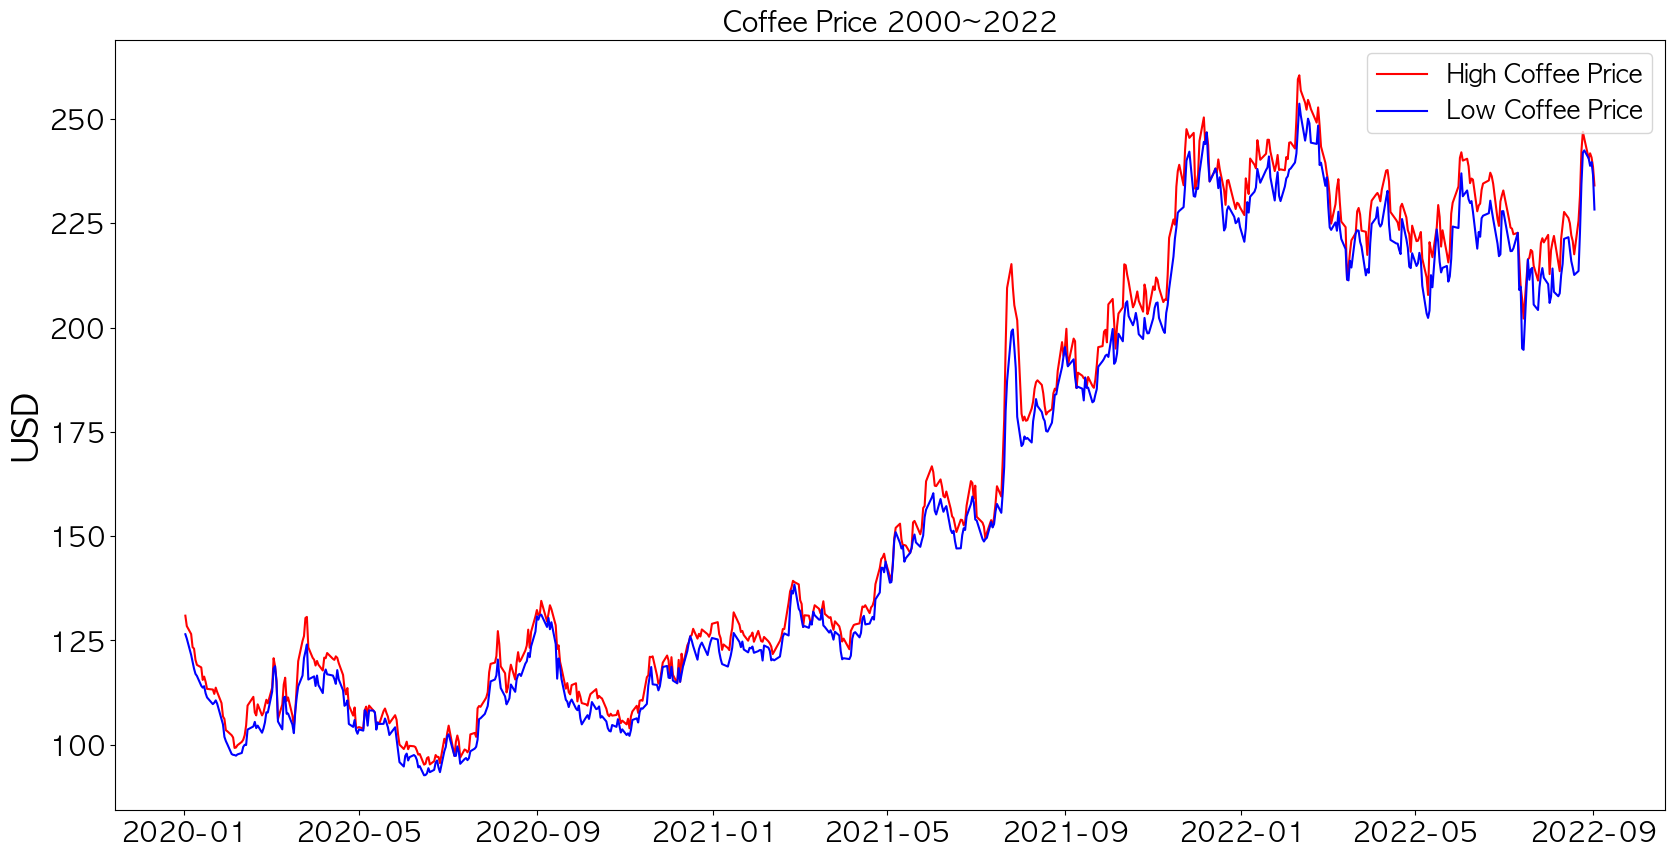

In [24]:
fig, ax1 = plt.subplots(figsize=(20, 10))

A = z[['High']]
B = z[['Low']]
line1 = ax1.plot(z['Date'], z['High'], label='High Coffee Price', color='r')
line2 = ax1.plot(z['Date'], z['Low'], label='Low Coffee Price', color='b')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('USD', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('Coffee Price 2000~2022', fontdict = {'fontsize' : 20})
plt.rcParams['font.size'] = 20
plt.show()

# 2020.11.2 ~ 2021.11.12

In [25]:
a = cp[(cp['Date']>='2020-11-02') & (cp['Date']<='2021-11-12')]

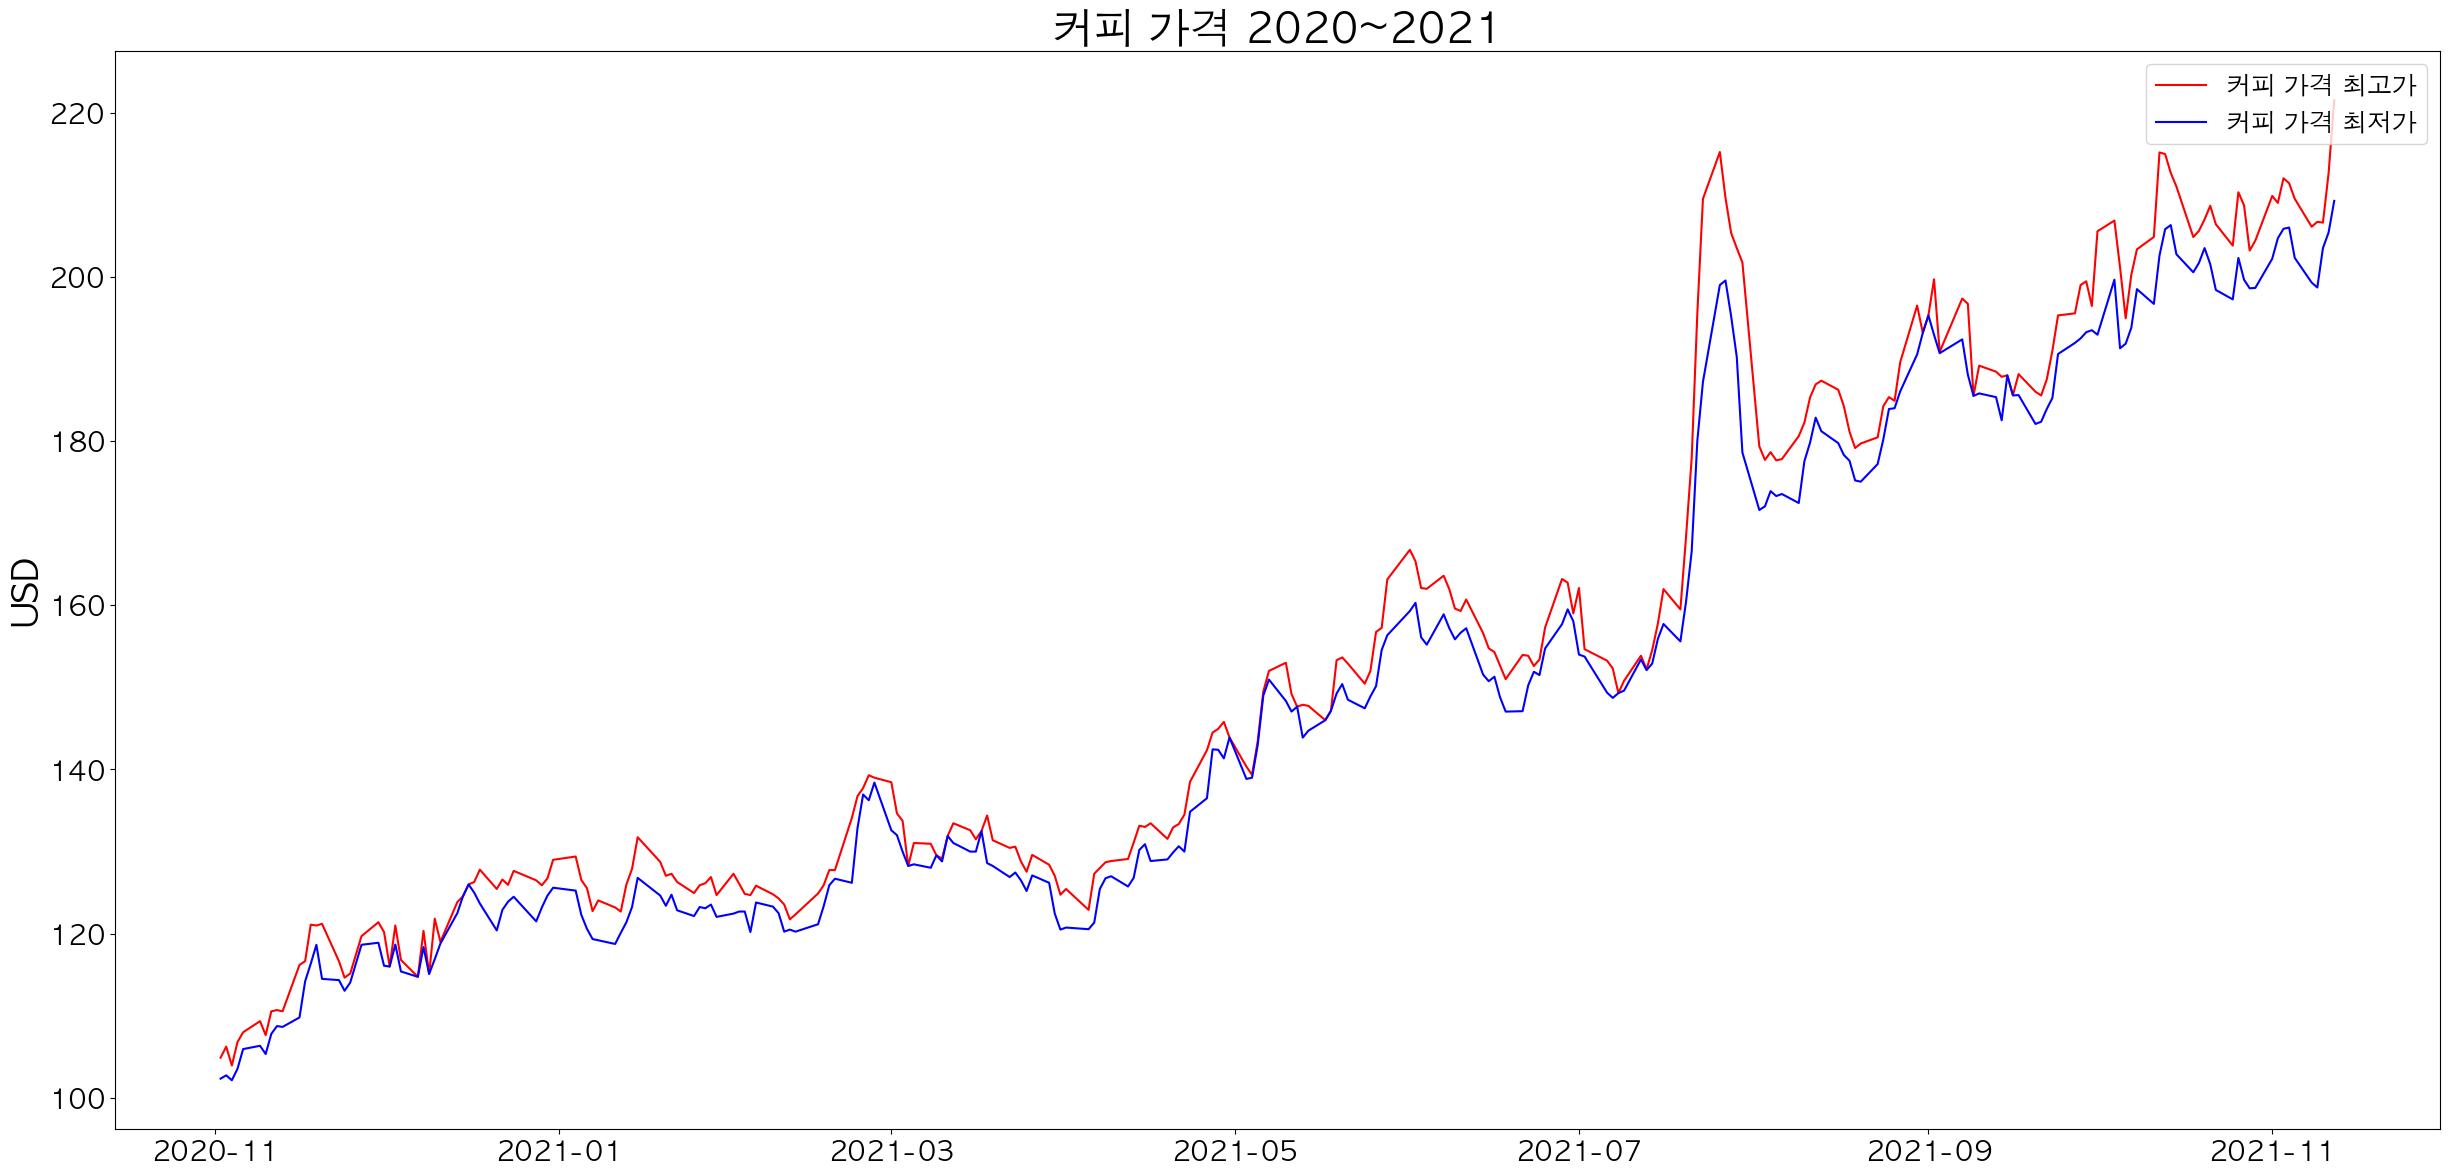

In [30]:
fig, ax1 = plt.subplots(figsize=(30, 14))

line1 = ax1.plot(a['Date'], a['High'], label='커피 가격 최고가', color='r')
line2 = ax1.plot(a['Date'], a['Low'], label='커피 가격 최저가', color='b')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('USD', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('커피 가격 2020~2021', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.show()

# 회귀분석 & 예측

In [110]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(a.High.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

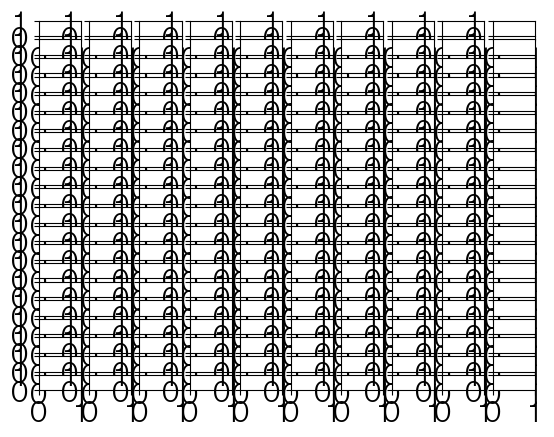

In [131]:
fig, ax = plt.subplots(20,10)
ax.plot('Date', 'High', data=a, color='0.75')
ax = sns.regplot(x='Date', y='High', data=a, ci=None, scatter_kws=dict(color='0.25'))

In [48]:
from sklearn.linear_model import LinearRegression

In [129]:
a.reset_index(inplace=True)

In [133]:
X = a[['Date']]
y = a['High']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 추세 기울기와 절편 출력
slope = model.coef_[0]
intercept = model.intercept_
print(f'추세 기울기 (slope): {slope:.2f}')
print(f'추세 절편 (intercept): {intercept:.2f}')

추세 기울기 (slope): 0.00
추세 절편 (intercept): -5062.34


In [137]:
y = np.asarray(a['High'])
X = a[['Date']]

In [138]:
model = LinearRegression() #create linear regression object
model.fit(X, y)

LinearRegression()

In [139]:
model.coef_

array([3.21890993e-15])

In [140]:
slope = model.coef_[0]
intercept = model.intercept_
print(f'추세 기울기 (slope): {slope:.2f}')
print(f'추세 절편 (intercept): {intercept:.2f}')

추세 기울기 (slope): 0.00
추세 절편 (intercept): -5062.34


In [145]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
 
#pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (20, 10)
#sns.regplot(x='Date', y='High', data=a)
coefficients = np.polyfit(np.asarray(X).astype(float), y, 1)
plt.xlim(a['High'].min()-1, a['High'].max()+1)
plt.grid()
plt.show()
 
z=np.polyfit(a['Date'], a['High'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('dist ~ speed', data=df).fit().summary()

TypeError: expected 1D vector for x

In [50]:
X

,Date
5283,2020-11-02
5284,2020-11-03
5285,2020-11-04
5286,2020-11-05
5287,2020-11-06
...,...
5539,2021-11-08
5540,2021-11-09
5541,2021-11-10
5542,2021-11-11


<AxesSubplot:>

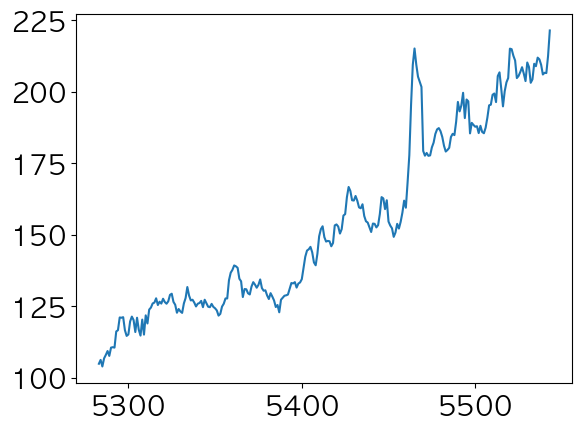

In [52]:
y.plot()

In [74]:
a['Date'].max() 

Timestamp('2021-11-12 00:00:00')

In [120]:
a.set_index('Date', inplace=True)

In [122]:
a.index

DatetimeIndex(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13',
               ...
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [124]:
X = a.index
y = a['High']
model = LinearRegression()
model.fit(np.array(X).reshape(-1, 1), y)

LinearRegression()

In [125]:
slope = model.coef_[0]
intercept = model.intercept_
print(f'추세 기울기 (slope): {slope:.2f}')
print(f'추세 절편 (intercept): {intercept:.2f}')

추세 기울기 (slope): 0.00
추세 절편 (intercept): -5062.34


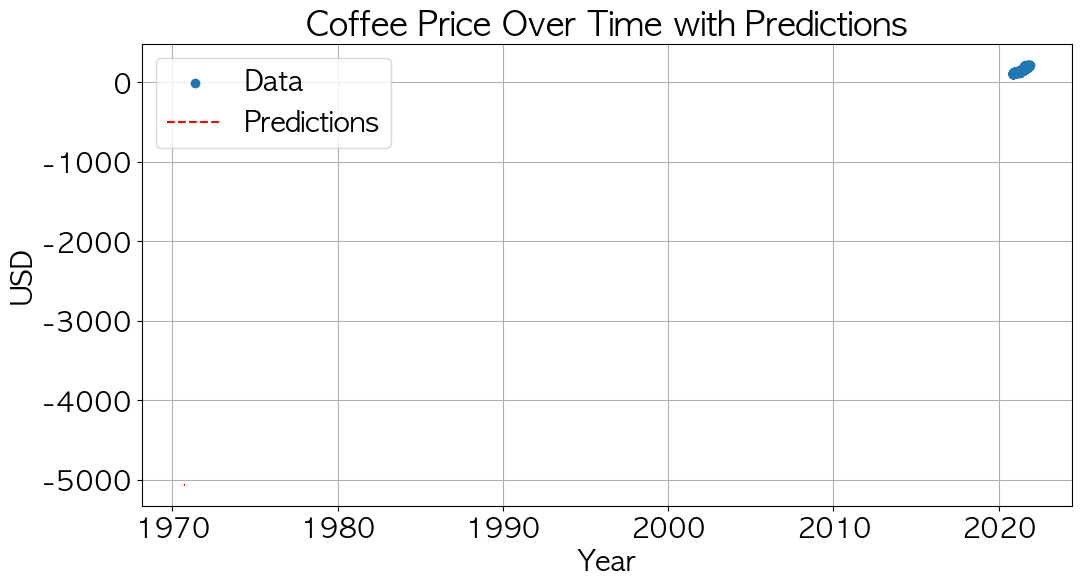

In [148]:
from dateutil.relativedelta import relativedelta

years_in_future = range(1, 31)  # 1년 후부터 30년 후까지
future_years = [a.index.max() +year for year in years_in_future]
predicted_productions = model.predict(np.array(future_years).reshape(-1, 1))

# 예측 결과를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.scatter(a['Date'], a['High'], label='Data')
plt.plot(future_years, predicted_productions, 'r--', label='Predictions')
plt.title('Coffee Price Over Time with Predictions')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
a['Date'].max()

Timestamp('2021-11-12 00:00:00')

In [58]:
np.array()

In [68]:
pd.datetime(future_years)

TypeError: an integer is required (got type list)

In [83]:
future_years[0]

Timestamp('2022-11-12 00:00:00')

"[Timestamp('2022-11-12 00:00:00'), Timestamp('2023-11-12 00:00:00'), Timestamp('2024-11-12 00:00:00'), Timestamp('2025-11-12 00:00:00'), Timestamp('2026-11-12 00:00:00'), Timestamp('2027-11-12 00:00:00'), Timestamp('2028-11-12 00:00:00'), Timestamp('2029-11-12 00:00:00'), Timestamp('2030-11-12 00:00:00'), Timestamp('2031-11-12 00:00:00'), Timestamp('2032-11-12 00:00:00'), Timestamp('2033-11-12 00:00:00'), Timestamp('2034-11-12 00:00:00'), Timestamp('2035-11-12 00:00:00'), Timestamp('2036-11-12 00:00:00'), Timestamp('2037-11-12 00:00:00'), Timestamp('2038-11-12 00:00:00'), Timestamp('2039-11-12 00:00:00'), Timestamp('2040-11-12 00:00:00'), Timestamp('2041-11-12 00:00:00'), Timestamp('2042-11-12 00:00:00'), Timestamp('2043-11-12 00:00:00'), Timestamp('2044-11-12 00:00:00'), Timestamp('2045-11-12 00:00:00'), Timestamp('2046-11-12 00:00:00'), Timestamp('2047-11-12 00:00:00'), Timestamp('2048-11-12 00:00:00'), Timestamp('2049-11-12 00:00:00'), Timestamp('2050-11-12 00:00:00'), Timestamp('2

# Another Data

사용하기 어려워 보임

In [84]:
a = pd.read_csv('커피가격/coffee-prices-historical-data.csv')
b = pd.read_csv('커피가격/cpi_in_usa.csv')
c = pd.read_csv('커피가격/us_inflation_rate_historical_data.csv')

In [88]:
a.isnull().sum()

date       0
 value    21
dtype: int64

In [91]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 62 non-null     object 
 1    Inflation Rate (%)  62 non-null     float64
 2    Annual Change       61 non-null     float64
 3                        0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


In [99]:
c[c[' Inflation Rate (%)'] == c[' Inflation Rate (%)'].max()]

,date,Inflation Rate (%),Annual Change,
20,1980-12-31,13.5492,2.29,NaN
